In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


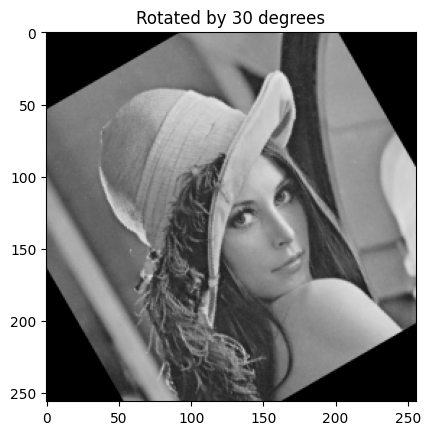

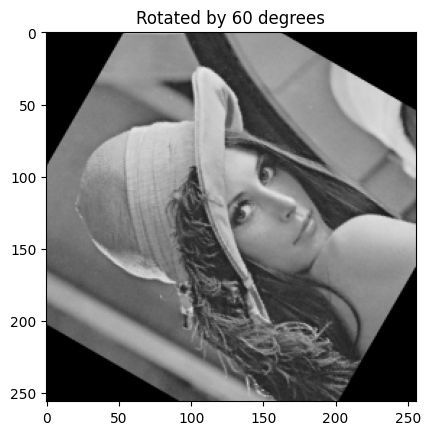

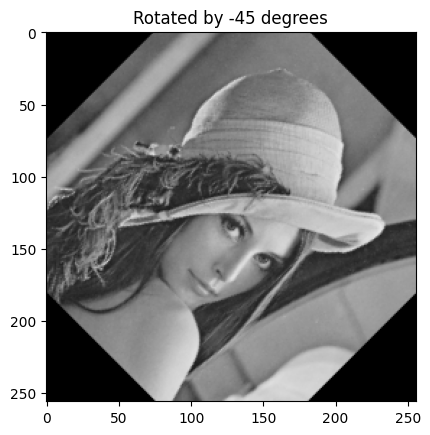

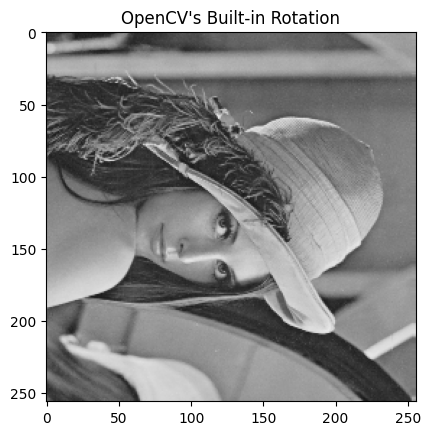

'Results Comparison: The code rotates the image at angles of 30°, 60°, and -45°. \nThe OpenCV method handles edge cases like boundaries better than our implementation,\n which might cut off parts of the image. Analyzing the differences between the two can \n reveal that the OpenCV function is optimized for various rotation tasks.'

In [ ]:
#Task-1 Rotation
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

image = cv2.imread('/content/drive/MyDrive/Assignment 1 database/Q3/lena_gray_256.tif')

angles = [30, 60, -45]
for angle in angles:
    rotated = rotate_image(image, angle)
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title(f"Rotated by {angle} degrees")
    plt.show()

rotated_cv = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(rotated_cv, cv2.COLOR_BGR2RGB))
plt.title("OpenCV's Built-in Rotation")
plt.show()
"""Results Comparison: The code rotates the image at angles of 30°, 60°, and -45°.
The OpenCV method handles edge cases like boundaries better than our implementation,
 which might cut off parts of the image. Analyzing the differences between the two can
 reveal that the OpenCV function is optimized for various rotation tasks."""


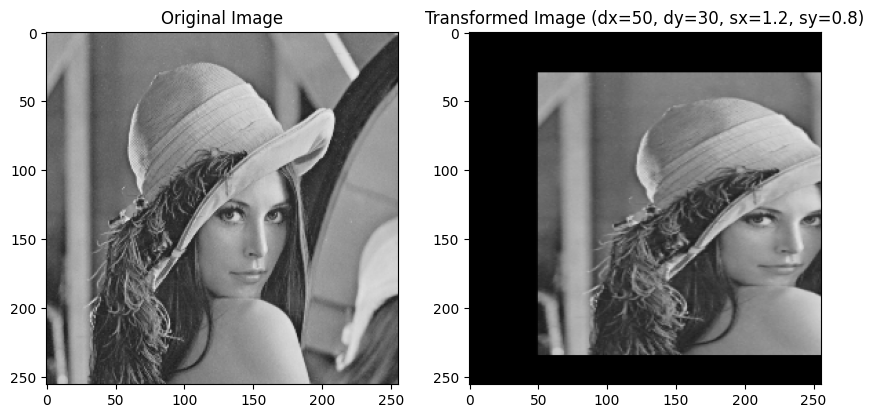

'Visualizing Results: This code translates and scales the image and visualizes it alongside the original. \n dx, dy, sx, and sy can be further adjusted to observe how translation and scaling affect the image.'

In [ ]:
#Task-2 Transformation Matrix Calculation
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx],
                     [0, sy, dy]])

def apply_transformation(image, dx, dy, sx, sy):
    matrix = transformation_matrix(dx, dy, sx, sy)
    (h, w) = image.shape[:2]
    transformed_image = cv2.warpAffine(image, matrix, (w, h))
    return transformed_image

image = cv2.imread('/content/drive/MyDrive/Assignment 1 database/Q3/lena_gray_256.tif')

dx, dy = 50, 30
sx, sy = 1.2, 0.8

transformed_image = apply_transformation(image, dx, dy, sx, sy)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title(f"Transformed Image (dx={dx}, dy={dy}, sx={sx}, sy={sy})")

plt.show()
"""Visualizing Results: This code translates and scales the image and visualizes it alongside the original.
 dx, dy, sx, and sy can be further adjusted to observe how translation and scaling affect the image."""


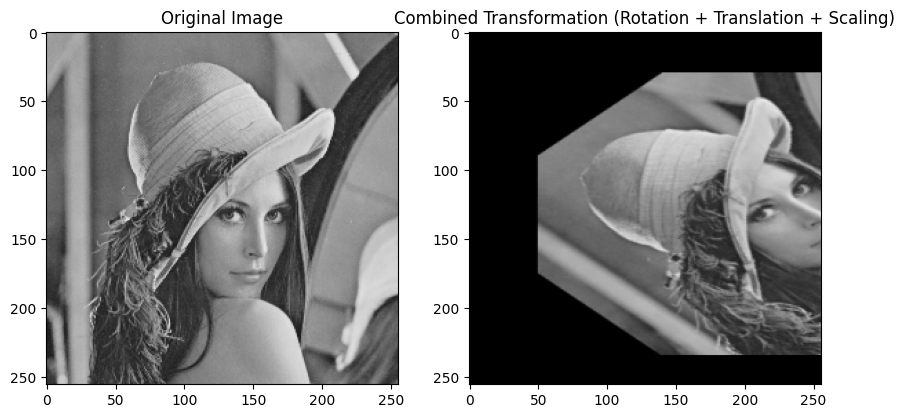

'Order of Applying Transformations: The order in which transformations are applied affects the final outcome. \nFor example, if we translate first and then rotate, the image might move out of the frame. \nConversely, rotating first ensures that the image rotates around \nits center and then moves according to the translation matrix.'

In [ ]:
#Task-3 Combining Transformations
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx],
                     [0, sy, dy]])

def apply_transformation(image, dx, dy, sx, sy):
    matrix = transformation_matrix(dx, dy, sx, sy)
    (h, w) = image.shape[:2]
    transformed_image = cv2.warpAffine(image, matrix, (w, h))
    return transformed_image

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

def combine_transformations(image, angle, dx, dy, sx, sy):
    rotated_image = rotate_image(image, angle)
    transformed_image = apply_transformation(rotated_image, dx, dy, sx, sy)
    return transformed_image

image = cv2.imread('/content/drive/MyDrive/Assignment 1 database/Q3/lena_gray_256.tif')

angle = 45
dx, dy = 50, 30
sx, sy = 1.2, 0.8

combined_image = combine_transformations(image, angle, dx, dy, sx, sy)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title(f"Combined Transformation (Rotation + Translation + Scaling)")

plt.show()
"""Order of Applying Transformations: The order in which transformations are applied affects the final outcome.
For example, if we translate first and then rotate, the image might move out of the frame.
Conversely, rotating first ensures that the image rotates around
its center and then moves according to the translation matrix."""

